In [31]:
# Basic Inspection

import pandas as pd
df_original = pd.read_csv("bengaluru_house_prices.csv")
print(df_original.info())                 # column names and dtypes
print("\nMissing values per column:\n", df_original.isna().sum())
display(df_original.describe(include='all').T)   # numeric + non-numeric summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None

Missing values per column:
 area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
area_type,13320,4,Super built-up Area,8790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
availability,13320,81,Ready To Move,10581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,13319,1305,Whitefield,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,13304,31,2 BHK,5199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
society,7818,2688,GrrvaGr,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_sqft,13320,2117,1200,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bath,13247.0,NaN,NaN,NaN,2.69261,1.341458,1.0,2.0,2.0,3.0,40.0
balcony,12711.0,NaN,NaN,NaN,1.584376,0.817263,0.0,1.0,2.0,2.0,3.0
price,13320.0,NaN,NaN,NaN,112.565627,148.971674,8.0,50.0,72.0,120.0,3600.0


In [32]:
df_before = df.copy()


In [33]:
import pandas as pd
import numpy as np
import re


# Create new working dataset
df = df_original.copy()

# Save step result
df.to_csv("cleaned_bengaluru_house_prices.csv", index=False)
print("dataset copied.")


dataset copied.


In [34]:
#drop columns that are usually useless in this dataset
for c in ['society']:
    if c in df.columns:
        df.drop(columns=c, inplace=True)
        print(f"Dropped column: {c}")



df.to_csv("cleaned_bengaluru_house_prices.csv", index=False)


Dropped column: society


In [35]:
import pandas as pd
csv_path = "cleaned_bengaluru_house_prices.csv"
df = pd.read_csv(csv_path)

if 'balcony' in df.columns:
    df['balcony'] = df['balcony'].fillna(0)
else:
    print("Warning: 'balcony' column not found. Skipping fillna for 'balcony'.")

# ---------- 2) Drop rows where essential features missing ----------
essential_cols = ['bath', 'size', 'total_sqft', 'location', 'availability']

df = df.dropna(subset=essential_cols, how='any')

print("Final dataset shape:", df.shape)
print(df.isnull().sum())

Final dataset shape: (13246, 8)
area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


In [36]:
# Step 5: extract BHK from size (e.g., "2 BHK" -> 2)
def extract_bhk(x):
    try:
        return int(str(x).split()[0])
    except:
        return np.nan

df['bhk'] = df['size'].apply(extract_bhk)
print("bhk NaNs:", df['bhk'].isna().sum())

df.drop('size', axis=1, inplace=True)

df.to_csv("cleaned_bengaluru_house_prices.csv", index=False)


bhk NaNs: 0


In [37]:
import pandas as pd
import re

# Load your dataset
df = pd.read_csv("cleaned_bengaluru_house_prices.csv")

# Function to categorize each total_sqft entry
def classify_sqft(value):
    if pd.isna(value):
        return "missing"
    
    v = str(value).lower().strip()

    # Pure numeric (int or float)
    if re.fullmatch(r'\d+(\.\d+)?', v):
        return "numeric_value"
    
    # Ranges like 1100 - 1450
    if re.fullmatch(r'\d+\s*-\s*\d+', v):
        return "range"

    # Units
    if "yard" in v:
        return "square_yards"
    if "acre" in v:
        return "acres"
    if "perch" in v:
        return "perch"
    if "guntha" in v:
        return "guntha"
    if "ground" in v:
        return "ground"
    if "meter" in v or "sqm" in v or "sq. m" in v or "m2" in v:
        return "square_meters"
    if "sqft" in v or "sq. ft" in v or "sq ft" in v:
        return "square_feet_with_text"
    if "carpet" in v:
        return "carpet_area"
    if "cent" in v:
        return "cent"

    # Unknown or messy text
    return "other_text"


# Apply classification
df["sqft_category"] = df["total_sqft"].apply(classify_sqft)

# Summary count
summary = df["sqft_category"].value_counts().reset_index()
summary.columns = ["Category", "Count"]

print("==== TOTAL_SQFT CATEGORY SUMMARY ====")
print(summary)

# Display examples from each category
def print_examples(category, n=10):
    print(f"\n====== EXAMPLES FROM CATEGORY: {category} ======")
    display(df[df["sqft_category"] == category].head(n)[["total_sqft"]])

# Print sample examples for each category
for cat in summary["Category"]:
    print_examples(cat)


==== TOTAL_SQFT CATEGORY SUMMARY ====
        Category  Count
0  numeric_value  13056
1          range    141
2  square_meters     17
3   square_yards     15
4          acres      8
5     other_text      3
6         guntha      2
7           cent      2
8          perch      1
9         ground      1

====== EXAMPLES FROM CATEGORY: numeric_value ======


,total_sqft
0,1056
1,2600
2,1440
3,1521
4,1200
5,1170
6,2732
7,3300
8,1310
9,1020



====== EXAMPLES FROM CATEGORY: range ======


,total_sqft
30,2100 - 2850
120,3067 - 8156
135,1042 - 1105
163,1145 - 1340
186,1015 - 1540
545,1195 - 1440
655,1120 - 1145
665,3090 - 5002
764,1160 - 1195
841,1115 - 1130



====== EXAMPLES FROM CATEGORY: square_meters ======


,total_sqft
406,34.46Sq. Meter
767,1000Sq. Meter
1388,716Sq. Meter
1699,1500Sq. Meter
1729,142.61Sq. Meter
3204,3040Sq. Meter
4085,167Sq. Meter
5595,204Sq. Meter
5938,78.03Sq. Meter
6264,84.53Sq. Meter



====== EXAMPLES FROM CATEGORY: square_yards ======


,total_sqft
863,1100Sq. Yards
1805,1574Sq. Yards
2292,361.33Sq. Yards
2859,117Sq. Yards
3261,500Sq. Yards
4264,315Sq. Yards
5501,188.89Sq. Yards
5632,45Sq. Yards
5672,133.3Sq. Yards
6229,122Sq. Yards



====== EXAMPLES FROM CATEGORY: acres ======


,total_sqft
1009,5.31Acres
1076,30Acres
6294,2.09Acres
7287,2Acres
7559,15Acres
7676,1.26Acres
10424,1.25Acres
11544,6Acres



====== EXAMPLES FROM CATEGORY: other_text ======


,total_sqft
1472,547.34 - 827.31
2211,1005.03 - 1252.49
3150,2249.81 - 4112.19



====== EXAMPLES FROM CATEGORY: guntha ======


,total_sqft
6510,24Guntha
11251,38Guntha



====== EXAMPLES FROM CATEGORY: cent ======


,total_sqft
5419,3Cents
6954,1500Cents



====== EXAMPLES FROM CATEGORY: perch ======


,total_sqft
642,4125Perch



====== EXAMPLES FROM CATEGORY: ground ======


,total_sqft
9362,1Grounds


In [38]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv("cleaned_bengaluru_house_prices.csv")

# ============================================
# 1) Convert ranges to midpoint
# ============================================

def convert_range(val):
    if isinstance(val, str) and '-' in val:
        parts = val.split('-')
        try:
            return (float(parts[0]) + float(parts[1])) / 2
        except:
            return np.nan
    return val

df['total_sqft'] = df['total_sqft'].apply(convert_range)

# ============================================
# 2) Convert units → Sq. Feet (DON'T EXTRACT FLOAT YET)
# ============================================

unit_conversion = {
    "Sq. Meter": 10.7639,
    "Sq. Meter.": 10.7639,
    "Sq. Yards": 9.0,
    "Sq. Yard": 9.0,
    "Sq. Yd": 9.0,
    "Acres": 43560,
    "Acre": 43560,
    "Perch": 272.25,
    "Guntha": 1089,
    "Ground": 2400,
    "Meter": 10.7639,
    "Yard": 9.0,
    "Sqft": 1.0,
    "Sqft.": 1.0,
    "Carpet Area": 1.0,
    "Cent": 435.6,
    "Cents": 435.6
}

def convert_units(val):
    if isinstance(val, str):
        text = val.strip()

        # First detect unit
        matched_unit = None
        for unit in unit_conversion:
            if unit.lower() in text.lower():
                matched_unit = unit
                break
        
        # If unit found → extract number AFTER conversion
        if matched_unit:
            # extract numeric value (could be int or float)
            numbers = re.findall(r"[0-9]*\.?[0-9]+", text)
            if not numbers:
                return np.nan
            num = float(numbers[0])

            # convert using multiplier
            return num * unit_conversion[matched_unit]

        # If only number → already in sq.ft
        # Don't extract yet (leave it as string to extract later)
        return text
    
    return val

df['total_sqft'] = df['total_sqft'].apply(convert_units)

# ============================================
# 3) Extract final float (only now!)
# ============================================

def extract_final_float(val):
    if isinstance(val, str):
        nums = re.findall(r"[0-9]*\.?[0-9]+", val)
        if nums:
            return float(nums[0])
        return np.nan
    return val

df['total_sqft'] = df['total_sqft'].apply(extract_final_float)

# ============================================
# 4) Convert to numeric and drop invalid
# ============================================

df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

df = df[df['total_sqft'].notnull()].reset_index(drop=True)

df.head()

df.to_csv("cleaned_bengaluru_house_prices.csv", index=False)


In [39]:
location_counts = df['location'].value_counts()
rare_locations = location_counts[location_counts < 10].index

df['location'] = df['location'].apply(lambda x: 'Other' if x in rare_locations else x)
#This prevents "dummy variable explosion" during modeling. It is statistically stronger and better for prediction accuracy.
df.to_csv("cleaned_bengaluru_house_prices.csv", index=False)

In [40]:
df["price_per_sqft"] = df["price"] * 100000 / df["total_sqft"]
df.to_csv("cleaned_bengaluru_house_prices.csv", index=False)



In [41]:
df.to_csv("before_outlier_removal.csv", index=False)


In [42]:
df = df[df.total_sqft / df.bhk >= 300]
df.to_csv("cleaned_bengaluru_house_prices.csv", index=False)


In [44]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, group in df.groupby("location"):
        m = group.price_per_sqft.mean()
        sd = group.price_per_sqft.std()
        reduced = group[(group.price_per_sqft > (m - sd)) &
                        (group.price_per_sqft < (m + sd))]
        df_out = pd.concat([df_out, reduced], ignore_index=True)
    return df_out

df = remove_pps_outliers(df)
df.to_csv("cleaned_bengaluru_house_prices.csv", index=False)


In [45]:
def remove_bhk_outliers(df):
    import numpy as np
    exclude = np.array([])

    for location, loc_df in df.groupby("location"):
        bhk_stats = {}

        for bhk, bhk_df in loc_df.groupby("bhk"):
            bhk_stats[bhk] = {
                "mean": bhk_df.price_per_sqft.mean(),
                "std": bhk_df.price_per_sqft.std()
            }

        for bhk, bhk_df in loc_df.groupby("bhk"):
            if (bhk-1) in bhk_stats:
                if bhk_stats[bhk]["mean"] < bhk_stats[bhk-1]["mean"]:
                    exclude = np.append(exclude, bhk_df.index.values)

    return df.drop(exclude)

df = remove_bhk_outliers(df)
df.to_csv("cleaned_bengaluru_house_prices.csv", index=False)


In [46]:
df.to_csv("after_outlier_removal.csv", index=False)


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df = pd.read_csv("cleaned_bengaluru_house_prices.csv")



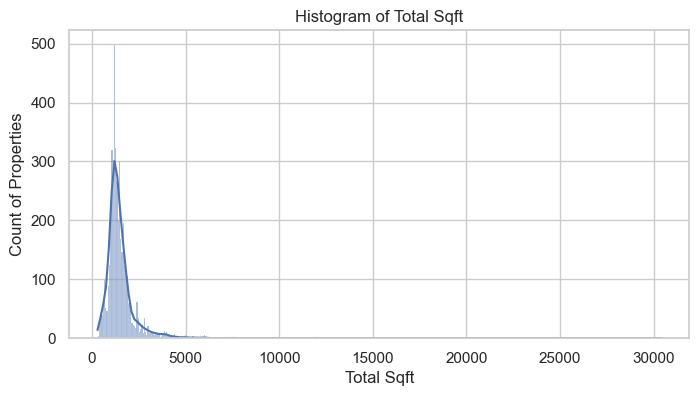

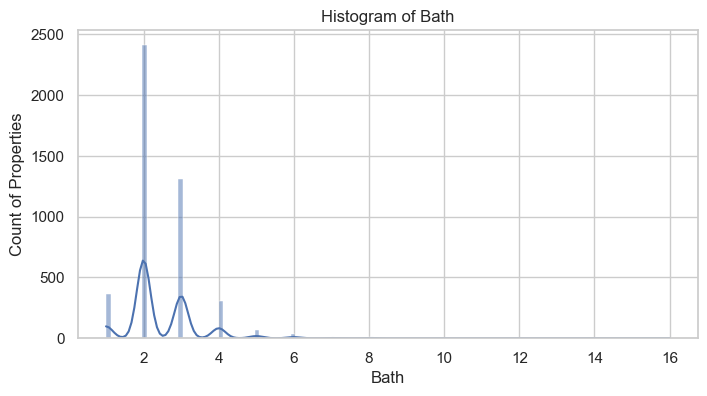

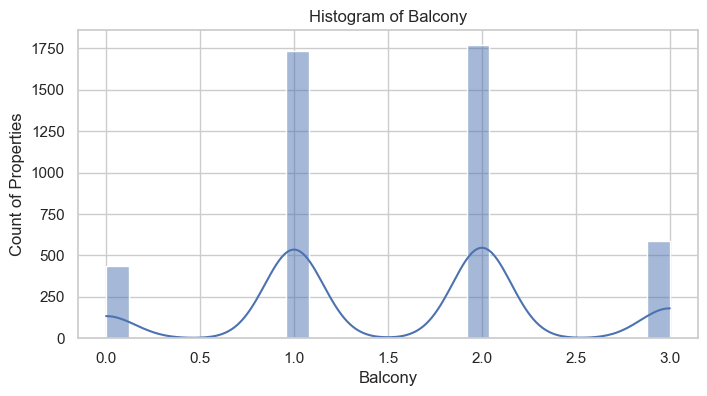

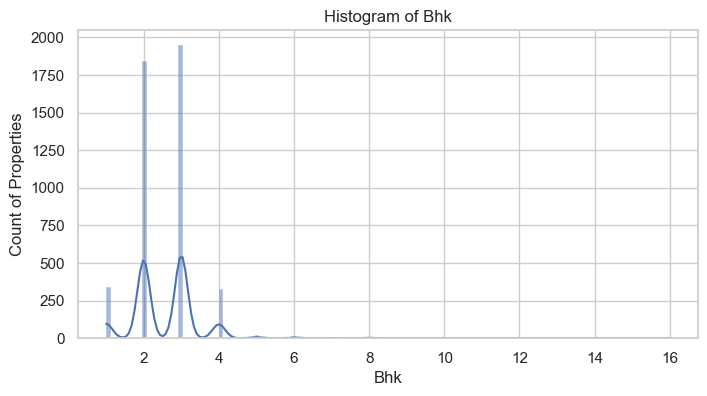

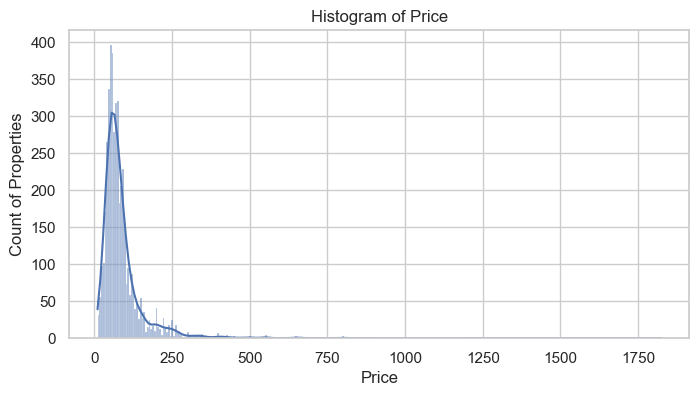

In [48]:
numeric_cols = ['total_sqft', 'bath', 'balcony', 'bhk', 'price']

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel("Count of Properties")
    plt.title(f"Histogram of {col.replace('_',' ').title()}")
    plt.show()


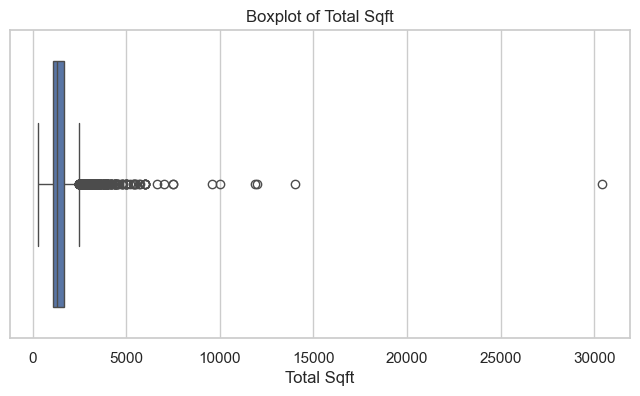

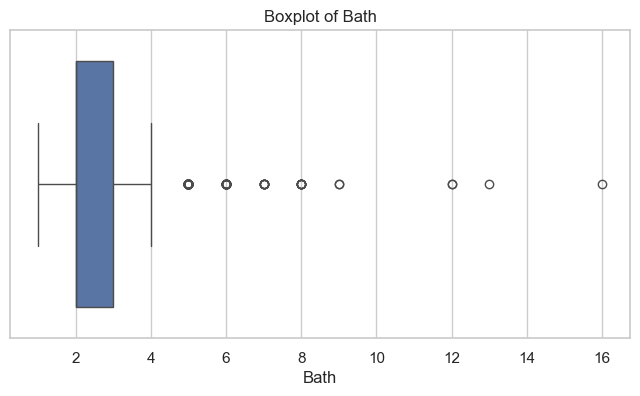

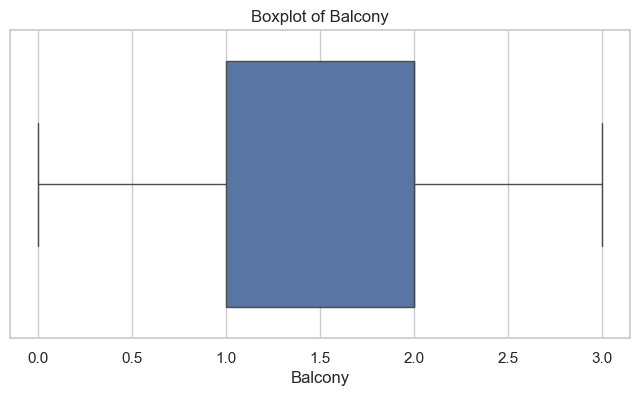

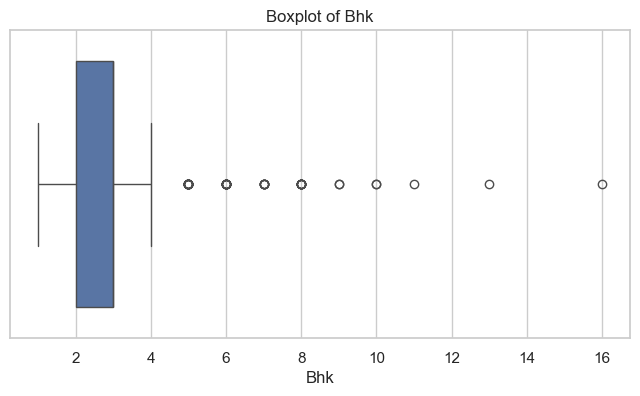

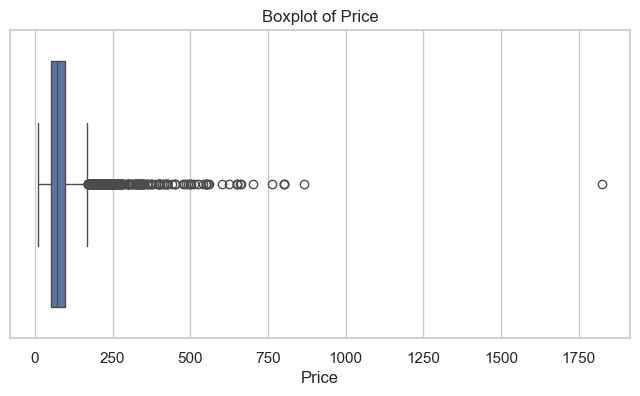

In [49]:
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.xlabel(col.replace("_", " ").title())
    plt.title(f"Boxplot of {col.replace('_',' ').title()}")
    plt.show()


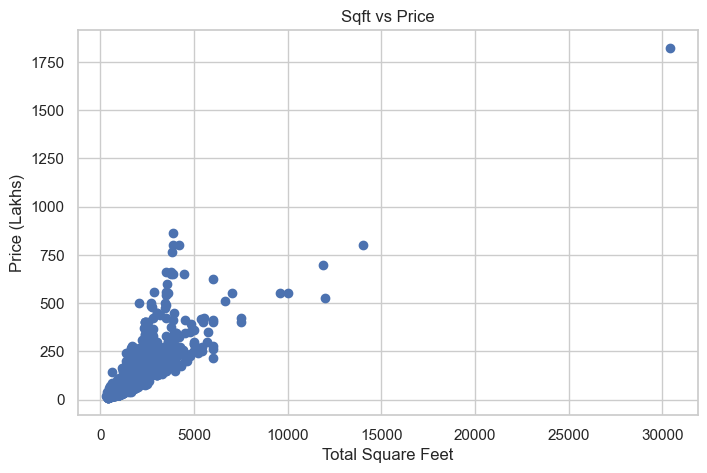

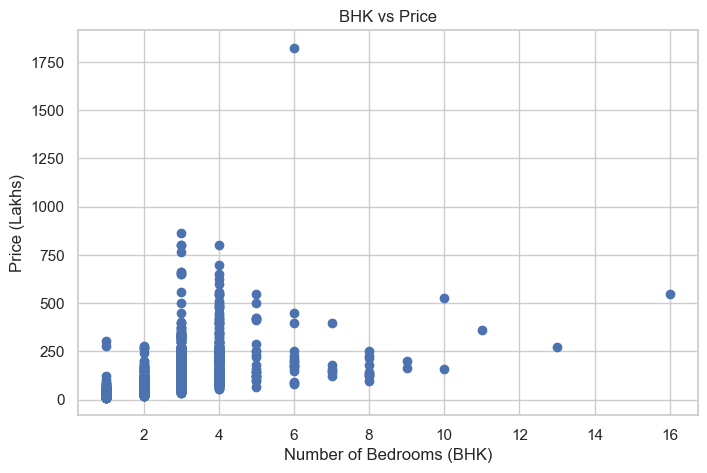

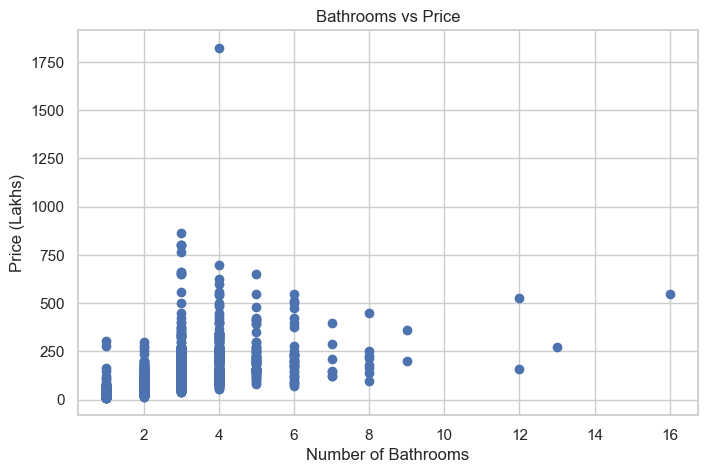

In [50]:
plt.figure(figsize=(8,5))
plt.scatter(df['total_sqft'], df['price'])
plt.xlabel("Total Square Feet")
plt.ylabel("Price (Lakhs)")
plt.title("Sqft vs Price")
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(df['bhk'], df['price'])
plt.xlabel("Number of Bedrooms (BHK)")
plt.ylabel("Price (Lakhs)")
plt.title("BHK vs Price")
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(df['bath'], df['price'])
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price (Lakhs)")
plt.title("Bathrooms vs Price")
plt.show()


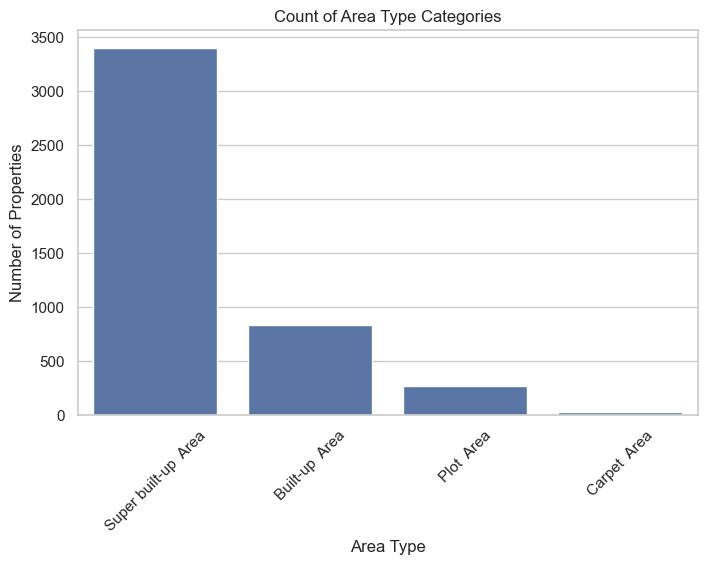

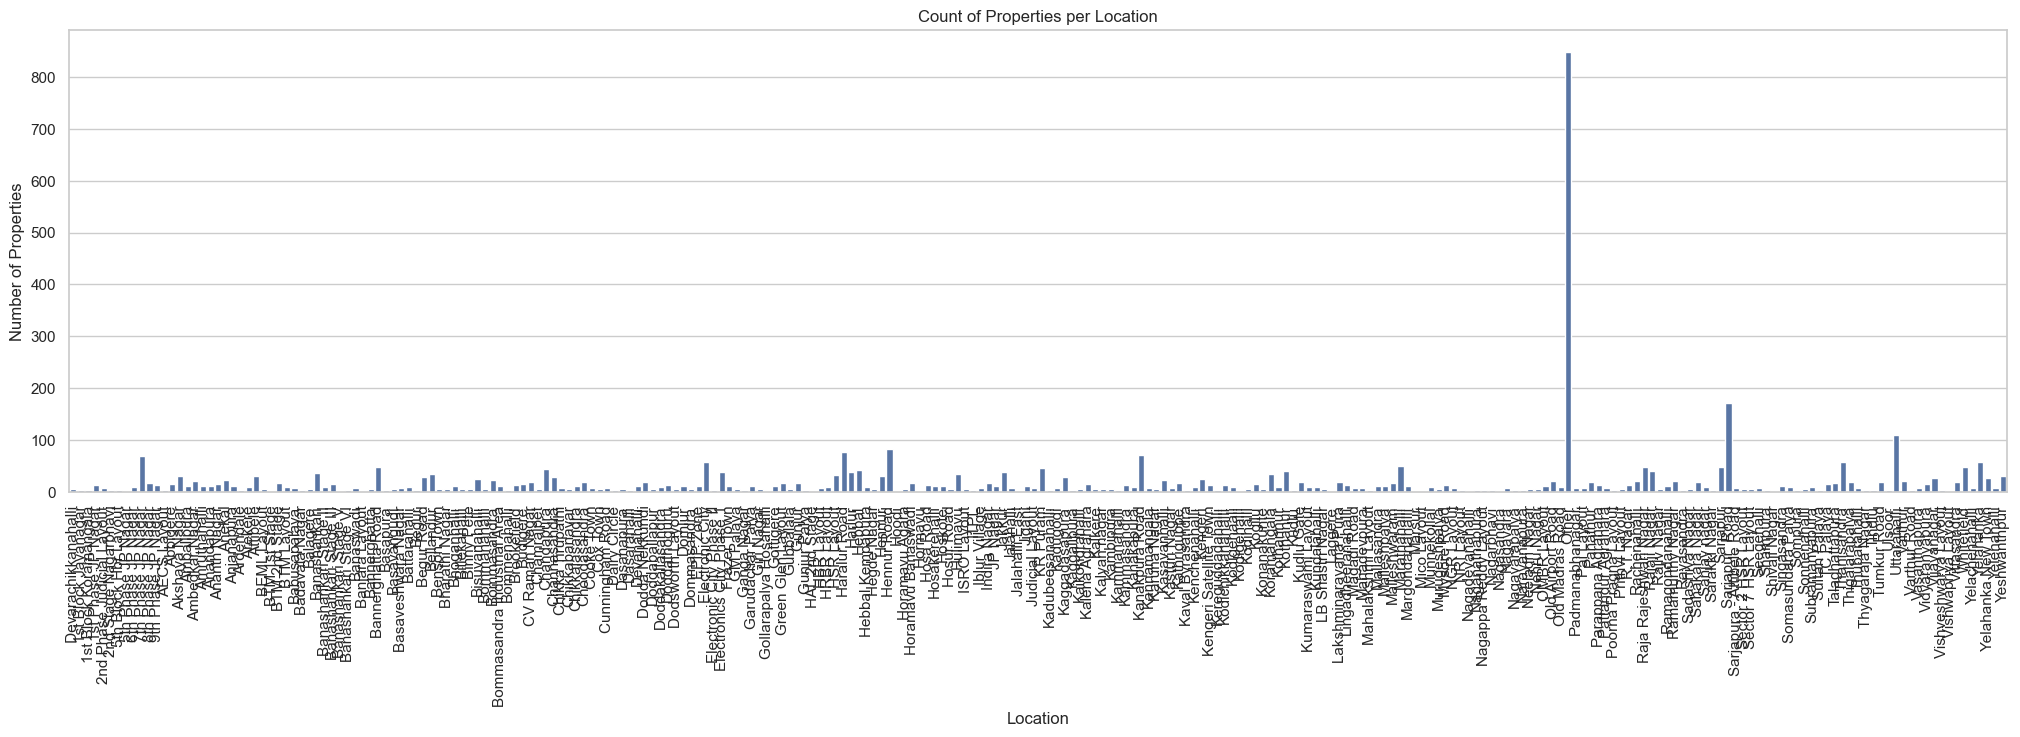

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['area_type'])
plt.xlabel("Area Type")
plt.ylabel("Number of Properties")
plt.title("Count of Area Type Categories")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(25,6))
sns.countplot(x=df['location'])
plt.xlabel("Location")
plt.ylabel("Number of Properties")
plt.title("Count of Properties per Location")
plt.xticks(rotation=90)
plt.show()


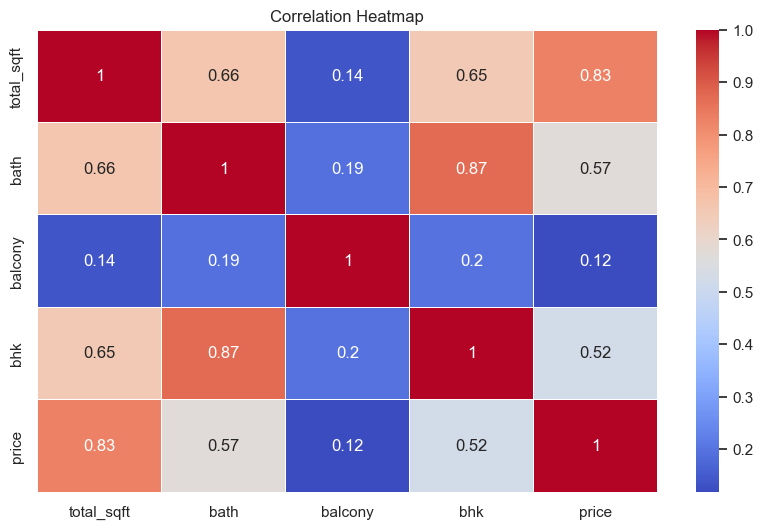

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


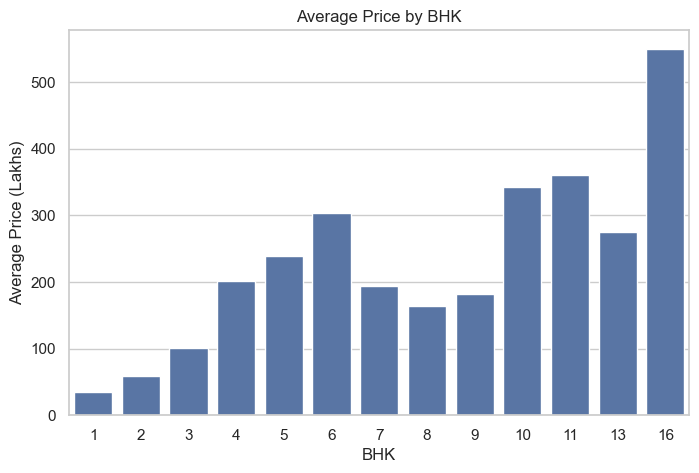

In [53]:
bhk_mean = df.groupby('bhk')['price'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=bhk_mean.index, y=bhk_mean.values)
plt.xlabel("BHK")
plt.ylabel("Average Price (Lakhs)")
plt.title("Average Price by BHK")
plt.show()


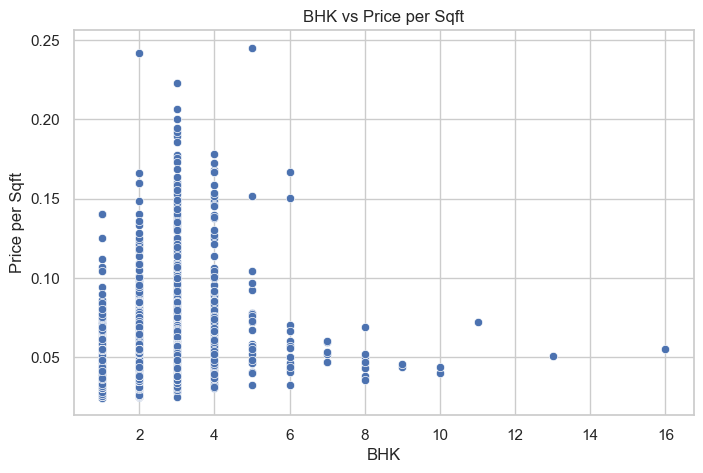

In [54]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['bhk'], y=df['price'] / df['total_sqft'])
plt.xlabel("BHK")
plt.ylabel("Price per Sqft")
plt.title("BHK vs Price per Sqft")
plt.show()


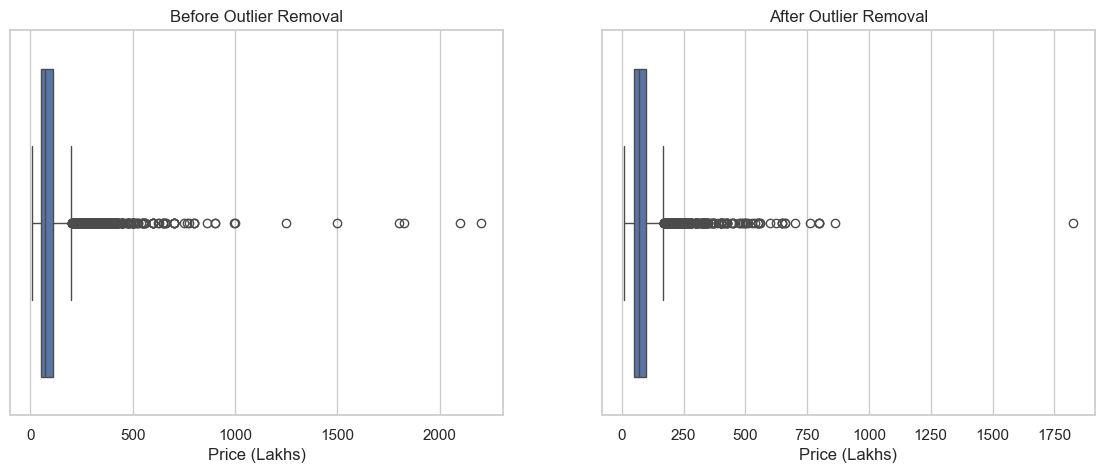

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

sns.boxplot(x=df_before['price'], ax=ax[0])
ax[0].set_title("Before Outlier Removal")
ax[0].set_xlabel("Price (Lakhs)")

sns.boxplot(x=df['price'], ax=ax[1])
ax[1].set_title("After Outlier Removal")
ax[1].set_xlabel("Price (Lakhs)")

plt.show()


In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\valup\OneDrive\Documents\Desktop\BA project\BA_Project_3\cleaned_bengaluru_house_prices.csv")

df['availability'] = df['availability'].apply(
    lambda x: "Ready To Move" if str(x).strip().lower() == "ready to move"
    else "Future Possession"
)

df.to_csv("cleaned_bengaluru_house_prices.csv", index=False)

print("✔ Availability column updated successfully!")



✔ Availability column updated successfully!


In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\valup\OneDrive\Documents\Desktop\BA project\BA_Project_3\cleaned_bengaluru_house_prices.csv")

print(df.columns.tolist())

# 🔹 1. Identify the categorical columns to encode
categorical_cols = ['location', 'availability', 'area_type']

# 🔹 2. Apply One-Hot Encoding
df = pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True   # prevents multicollinearity (dummy variable trap)
)

# 🔹 3. Print final columns to verify new one-hot encoded features
print("One-hot encoding completed. Updated columns:")
print(df.columns)



['total_sqft', 'bath', 'balcony', 'price', 'bhk', 'price_per_sqft', 'location_1st Block Jayanagar', 'location_1st Block Koramangala', 'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout', 'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout', 'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar', 'location_7th Phase JP Nagar', 'location_8th Phase JP Nagar', 'location_9th Phase JP Nagar', 'location_AECS Layout', 'location_Abbigere', 'location_Akshaya Nagar', 'location_Ambalipura', 'location_Ambedkar Nagar', 'location_Amruthahalli', 'location_Anandapura', 'location_Ananth Nagar', 'location_Anekal', 'location_Anjanapura', 'location_Ardendale', 'location_Arekere', 'location_Attibele', 'location_BEML Layout', 'location_BTM 1st Stage', 'location_BTM 2nd Stage', 'location_BTM Layout', 'location_Babusapalaya', 'location_Badavala Nagar', 'location_Balagere', 'location_Banashankari', 'location_Banashankari Stage II', 'location_Banashankari Stage III', 'location_B

KeyError: "None of [Index(['location', 'availability', 'area_type'], dtype='object')] are in the [columns]"

In [2]:
# ============================================================
# MODEL TRAINING SCRIPT (FINAL VERSION)
# ============================================================

import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# ============================================================
# 1. LOAD CLEANED DATA
# ============================================================
print("\n📌 Loading cleaned dataset...")
df = pd.read_csv("cleaned_bengaluru_house_prices.csv")

print("Loaded successfully!")
print("Columns:", df.columns.tolist())


# ============================================================
# 2. REMOVE LEAKAGE FEATURE (IMPORTANT)
# ============================================================
if "price_per_sqft" in df.columns:
    df = df.drop("price_per_sqft", axis=1)
    print("✔ Removed leakage feature: price_per_sqft")


# ============================================================
# 3. SPLIT FEATURES & TARGET
# ============================================================
X = df.drop("price", axis=1)
y = df["price"]


# ============================================================
# 4. ONE-HOT ENCODING
# ============================================================
print("\n🔄 Performing One-Hot Encoding...")
X_encoded = pd.get_dummies(X, drop_first=True)

# Save feature names
with open("feature_names.pkl", "wb") as f:
    pickle.dump(X_encoded.columns.tolist(), f)

print(f"Total encoded features: {len(X_encoded.columns)}")
print("✔ Saved → feature_names.pkl")


# ============================================================
# 5. TRAIN–TEST SPLIT
# ============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

print("\n📊 Train/Test Split Done!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


# ============================================================
# 6. DEFINE MODELS
# ============================================================
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []


# ============================================================
# 7. TRAIN & EVALUATE MODELS
# ============================================================
print("\n🚀 Training & Evaluating Models...\n")

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results.append([name, rmse, mae, r2])

    print(f"{name}:  RMSE={rmse:.2f},  MAE={mae:.2f},  R2={r2:.2f}")


# ============================================================
# 8. SAVE MODEL PERFORMANCE TABLE
# ============================================================
results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2"])
results_df.to_csv("model_performance.csv", index=False)

print("\n📁 Saved → model_performance.csv")
print(results_df)


# ============================================================
# 9. SELECT BEST MODEL (LOWEST RMSE)
# ============================================================
best_model_name = results_df.loc[results_df["RMSE"].idxmin(), "Model"]
best_model = models[best_model_name]

# Save the best fitted model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("\n===============================================")
print(f"🏆 BEST MODEL SELECTED → {best_model_name}")
print("✔ Saved → best_model.pkl")
print("===============================================\n")



📌 Loading cleaned dataset...
Loaded successfully!
Columns: ['total_sqft', 'bath', 'balcony', 'price', 'bhk', 'price_per_sqft', 'location_1st Block Jayanagar', 'location_1st Block Koramangala', 'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout', 'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout', 'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar', 'location_7th Phase JP Nagar', 'location_8th Phase JP Nagar', 'location_9th Phase JP Nagar', 'location_AECS Layout', 'location_Abbigere', 'location_Akshaya Nagar', 'location_Ambalipura', 'location_Ambedkar Nagar', 'location_Amruthahalli', 'location_Anandapura', 'location_Ananth Nagar', 'location_Anekal', 'location_Anjanapura', 'location_Ardendale', 'location_Arekere', 'location_Attibele', 'location_BEML Layout', 'location_BTM 1st Stage', 'location_BTM 2nd Stage', 'location_BTM Layout', 'location_Babusapalaya', 'location_Badavala Nagar', 'location_Balagere', 'location_Banashankari', 'location_Banashanka

In [14]:
print(df.columns.tolist())



['total_sqft', 'bath', 'balcony', 'price', 'bhk', 'location_1st Block Jayanagar', 'location_1st Block Koramangala', 'location_1st Phase JP Nagar', 'location_2nd Phase Judicial Layout', 'location_2nd Stage Nagarbhavi', 'location_5th Block Hbr Layout', 'location_5th Phase JP Nagar', 'location_6th Phase JP Nagar', 'location_7th Phase JP Nagar', 'location_8th Phase JP Nagar', 'location_9th Phase JP Nagar', 'location_AECS Layout', 'location_Abbigere', 'location_Akshaya Nagar', 'location_Ambalipura', 'location_Ambedkar Nagar', 'location_Amruthahalli', 'location_Anandapura', 'location_Ananth Nagar', 'location_Anekal', 'location_Anjanapura', 'location_Ardendale', 'location_Arekere', 'location_Attibele', 'location_BEML Layout', 'location_BTM 1st Stage', 'location_BTM 2nd Stage', 'location_BTM Layout', 'location_Babusapalaya', 'location_Badavala Nagar', 'location_Balagere', 'location_Banashankari', 'location_Banashankari Stage II', 'location_Banashankari Stage III', 'location_Banashankari Stage 